In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.axislines import SubplotZero
import seaborn as sns
from scipy.stats import mannwhitneyu

In [17]:
regs = np.load('Sidhu_regressions.npz')
files = regs.files

In [18]:
files

['Sidhu_rFon1',
 'Sidhu_rFon1D',
 'Sidhu_rFon2i1',
 'Sidhu_Fon1',
 'Sidhu_Fon2i1',
 'Sidhu_Fest']

In [20]:
rFon1D = regs['Sidhu_rFon1D']
print(rFon1D)

[[ 1.12289855  1.3013918  -0.13406143 -0.25096563  0.          0.        ]
 [ 0.42878155 -0.656       0.06411067 -0.37027523  0.          0.        ]
 [ 0.18032412 -0.21134216 -0.62202247  0.46695652  0.          0.        ]
 [-0.12615385  0.07090909 -0.25781494  0.12678346  0.          0.        ]
 [-0.2417744   0.20968541  0.41159108 -0.20752664  0.          0.        ]
 [ 0.23909385  0.34418605  0.00533978 -0.30771054  0.          0.        ]
 [-0.73195402  0.1927907  -0.31072373  0.44916385  0.          0.        ]
 [ 0.80758818 -0.93169231 -0.06157021  0.17628231 -0.75391304  0.        ]
 [-0.02214502  1.13941176 -0.04955882 -0.28480315  1.12289855 -0.75391304]
 [ 0.18631778  0.51367816  0.3519403  -0.41214783  1.12289855  0.18720588]
 [ 0.06825758  1.13941176 -0.77855908 -0.07436266 -0.96058824  0.5121393 ]
 [-0.13958656  0.57300538  0.67015152 -0.20530021  0.         -0.08523077]
 [ 0.01028736  0.36587065 -0.105315    0.00525515  1.12289855 -0.08523077]
 [ 0.06825758  1.12289855

In [34]:
col_names = ['G','R','S','Y','z','n'] #where z= ACDEFHIKLMNPQTVW (all other residues)

In [35]:
rFon1D_df = pd.DataFrame(rFon1D, index=range(19), columns=col_names)
rFon1D_df

,G,R,S,Y,z,n
0,1.122899,1.301392,-0.134061,-0.250966,0.000000,0.000000
1,0.428782,-0.656000,0.064111,-0.370275,0.000000,0.000000
2,0.180324,-0.211342,-0.622022,0.466957,0.000000,0.000000
3,-0.126154,0.070909,-0.257815,0.126783,0.000000,0.000000
4,-0.241774,0.209685,0.411591,-0.207527,0.000000,0.000000
5,0.239094,0.344186,0.005340,-0.307711,0.000000,0.000000
6,-0.731954,0.192791,-0.310724,0.449164,0.000000,0.000000
7,0.807588,-0.931692,-0.061570,0.176282,-0.753913,0.000000
8,-0.022145,1.139412,-0.049559,-0.284803,1.122899,-0.753913
9,0.186318,0.513678,0.351940,-0.412148,1.122899,0.187206


<AxesSubplot:>

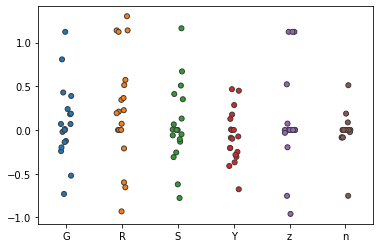

In [37]:
sns.stripplot(data=rFon1D_df, linewidth=1)

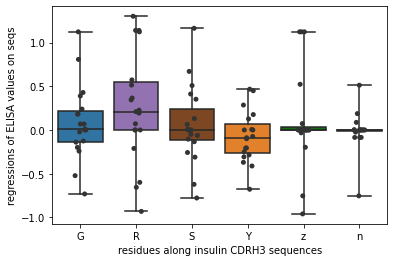

In [55]:
ortho_seqs_colors = {"G": "tab:blue", "R": "tab:purple", "S":"saddlebrown", "Y":"tab:orange", "z":"g", "n":"mediumvioletred"}
ax = sns.boxplot(data=rFon1D_df, whis=np.inf,palette=ortho_seqs_colors)
ax = sns.stripplot(data=rFon1D_df, color=".2")
plt.xlabel('residues along insulin CDRH3 sequences')
plt.ylabel('regressions of ELISA values on seqs')
plt.savefig('insulin_elisa_insulinseqs_rFon1D_boxplot.png', dpi=600)

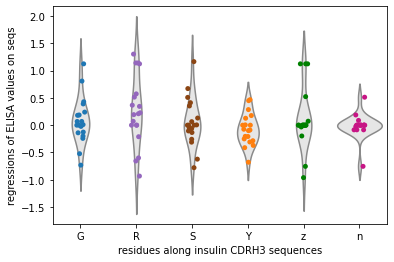

In [56]:
ax = sns.violinplot(data=rFon1D_df, inner=None, color=".9")
ax = sns.stripplot(data=rFon1D_df, palette=ortho_seqs_colors)
plt.xlabel('residues along insulin CDRH3 sequences')
plt.ylabel('regressions of ELISA values on seqs')
plt.savefig('insulin_elisa_insulinseqs_rFon1D_violinplot.png', dpi=600)

## Implementation of Mann Whitney U Test to compare the regression distributions of R and Y
[tutorial](https://towardsdatascience.com/determine-if-two-distributions-are-significantly-different-using-the-mann-whitney-u-test-1f79aa249ffb) and [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

In [59]:
def mann_whitney_u_test(dist1, dist2):
    u_statistic, p_val = mannwhitneyu(dist1,dist2)
    return u_statistic, p_val

In [60]:
mann_whitney_u_test(list(rFon1D_df['R']), list(rFon1D_df['Y']))

(254.0, 0.032879439609254414)